# **THE SPARKS FOUNDATION**

**Task: Prediction using Supervised ML**
*  Predict the percentage of an student based on the no. of study hours.

This is a simple linear regression task as it involves just 2 variables.


Data can be found at http://bit.ly/w-data

---
***Author - ABHISHEK M SHARMA*** (https://www.linkedin.com/in/abhisheksh10/) 

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Importing Dataset
data = pd.read_csv("http://bit.ly/w-data") 
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Summary of Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
# Check is there any missing value
data.isna().sum()

Hours     0
Scores    0
dtype: int64

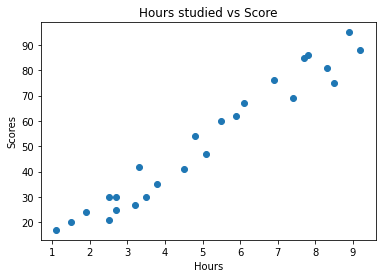

In [5]:
# Visulize the data
plt.scatter(data.Hours,data.Scores)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours studied vs Score')
plt.show()

# Training the Model
Split data for training and testing set

In [6]:
# Spliting the data into x and y
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [7]:
# Splitting into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size=0.2)

In [8]:
len(x_train), len(x_test), len(y_train), len(y_test)

(20, 5, 20, 5)

In [9]:
# Traning the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train);

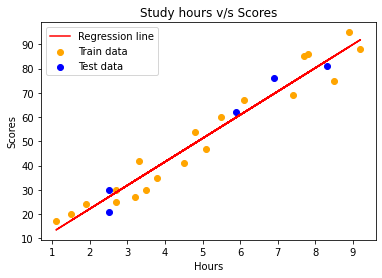

In [10]:
# plotting the regression line
line = model.coef_*x + model.intercept_

plt.scatter(x_train, y_train, label = "Train data", color = 'orange')
plt.scatter(x_test, y_test, label = "Test data", color = 'blue')

plt.title("Study hours v/s Scores")

plt.plot(x, line, color = 'red', label = 'Regression line')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

# Making Predictions

In [11]:
# Prediction the score
y_preds = model.predict(x_test)
y_preds

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [12]:
y_test

array([81, 30, 21, 76, 62])

In [13]:
# Comparing Actual vs Prediction Scores
df = pd.DataFrame({"Actual_Score":y_test, "Predicted_Score":y_preds, "Variance":y_test-y_preds})
df

,Actual_Score,Predicted_Score,Variance
0,81,83.188141,-2.188141
1,30,27.032088,2.967912
2,21,27.032088,-6.032088
3,76,69.633232,6.366768
4,62,59.951153,2.048847


# Evaluation of the Model

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

MAE = mean_absolute_error(y_test, y_preds)
MSE = mean_squared_error(y_test, y_preds)
RMSE = np.sqrt(MSE)
r2 = round(r2_score(y_test, y_preds)*100,3)

print(f"Mean Absolute Error : {MAE}")
print(f"Mean Squared Error : {MSE}")
print(f"Root Mean Squared Error : {RMSE}")
print(f"R2Score : {r2}")

Mean Absolute Error : 3.9207511902099244
Mean Squared Error : 18.943211722315272
Root Mean Squared Error : 4.352380006653288
R2Score : 96.781


#### Question
**What will be predicted score if a student studies for 9.25 hrs/ day?**

In [15]:
hrs = [9.25]
score = model.predict([hrs])
print(f"Predicted Score: {round(score[0],2)}")

Predicted Score: 92.39


From the above result we can say that if a studied for 9.25 then student will secured 92.39 MARKS